<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ff6f61; padding: 20px; background-color: #1d2635; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); width: 60%; margin: auto;">
    <h1 style="color: #ffb84d; text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 10px; font-size: 38px;">AI-Powered Resume Parser & Job Matcher</h1>
</div>


<img src="https://interviewdesk.ai/wp-content/uploads/2023/12/AI-Powered-JD-to-CV-Matcher.png" alt="AI Generated Image" width="1500" height = 800/>

## **Gather Data ✅**

**What You Need?**
- Resumes (PDF/DOCX) → Collect sample resumes from Kaggle, Indeed, or generate synthetic ones.
- Job Descriptions → Scrape from LinkedIn/Indeed or use existing datasets.

**Where to Find Data?**

- Kaggle: <a href = "https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset">Resume Datasets</a>
- Kaggle: <a href = "https://www.kaggle.com/datasets/kshitizregmi/jobs-and-job-description">Job Title and Job Description Dataset</a>

In [1]:
!mkdir -p resume_dataset

!kaggle datasets download -d gauravduttakiit/resume-dataset -o
!unzip -o resume-dataset.zip -d temp_gaurav
!mv temp_gaurav/* resume_dataset/
!rm -rf temp_gaurav resume-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 82.7MB/s]
Archive:  resume-dataset.zip
  inflating: temp_gaurav/UpdatedResumeDataSet.csv  


In [2]:
!kaggle datasets download -d kshitizregmi/jobs-and-job-description
!unzip -o jobs-and-job-description.zip

Dataset URL: https://www.kaggle.com/datasets/kshitizregmi/jobs-and-job-description
License(s): CC0-1.0
  0% 0.00/1.48M [00:00<?, ?B/s]
100% 1.48M/1.48M [00:00<00:00, 36.4MB/s]
Archive:  jobs-and-job-description.zip
  inflating: job_title_des.csv       


In [3]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 8.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=ccb464a85822cf51c9fce4d4dcbc4e7b092a4cd82879358bf3aac03608bb2a07
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [4]:
!pip install sentence-transformers tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## **Import Dependencies ✅**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
import warnings
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import swifter
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'textcat'])

## **Load Data ✅**

In [6]:
resume_data = pd.read_csv("/content/resume_dataset/UpdatedResumeDataSet.csv", encoding="utf-8")
job_data = pd.read_csv('/content/job_title_des.csv')

#### **Explore Data ✅**

In [7]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
job_data.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [9]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [10]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


In [11]:
resume_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
job_data['Job Title'].unique()

array(['Flutter Developer', 'Django Developer', 'Machine Learning',
       'iOS Developer', 'Full Stack Developer', 'Java Developer',
       'JavaScript Developer', 'DevOps Engineer', 'Software Engineer',
       'Database Administrator', 'Wordpress Developer', 'PHP Developer',
       'Backend Developer', 'Network Administrator', 'Node js developer'],
      dtype=object)

#### **Mapping Categories ✅**

In [13]:
category_mapping = {
    'HR': 'Human Resources',
    'Advocate': 'Legal',
    'Web Designing': 'Arts & Design',
    'Mechanical Engineer': 'Engineering',
    'Health and fitness': 'Healthcare & Nursing',
    'Civil Engineer': 'Engineering',
    'Java Developer': 'Software & IT',
    'Business Analyst': 'Data Science',
    'SAP Developer': 'Software & IT',
    'Automation Testing': 'Software & IT',
    'Electrical Engineering': 'Engineering',
    'Operations Manager': 'Project & Program Management',
    'Python Developer': 'Software & IT',
    'DevOps Engineer': 'Software & IT',
    'Network Security Engineer': 'Software & IT',
    'PMO': 'Project & Program Management',
    'Database': 'Software & IT',
    'Hadoop': 'Data Science',
    'ETL Developer': 'Data Science',
    'DotNet Developer': 'Software & IT',
    'Blockchain': 'Software & IT',
    'Testing': 'Software & IT'
}
category_mapping_2 = {
    'Flutter Developer': 'Software & IT',
    'Django Developer': 'Software & IT',
    'Machine Learning': 'Data Science',
    'iOS Developer': 'Software & IT',
    'Full Stack Developer': 'Software & IT',
    'Java Developer': 'Software & IT',
    'JavaScript Developer': 'Software & IT',
    'DevOps Engineer': 'Software & IT',
    'Software Engineer': 'Software & IT',
    'Database Administrator': 'Software & IT',
    'Wordpress Developer': 'Software & IT',
    'PHP Developer': 'Software & IT',
    'Backend Developer': 'Software & IT',
    'Network Administrator': 'Software & IT',
    'Node js developer': 'Software & IT'
}

In [14]:
resume_data['Category'] = resume_data['Category'].replace(category_mapping)

In [15]:
job_data['Category'] = job_data['Job Title'].replace(category_mapping_2)

In [16]:
set(job_data["Category"]).intersection(set(resume_data["Category"]))

{'Data Science', 'Software & IT'}

## **Exploratory Data Analysis (EDA)**

In [17]:
resume_cat_count = resume_data['Category'].value_counts().sort_values(ascending=False).reset_index()
job_cat_count = job_data['Category'].value_counts().sort_values(ascending=False).reset_index()

### **📊 1. Check Category Distribution**

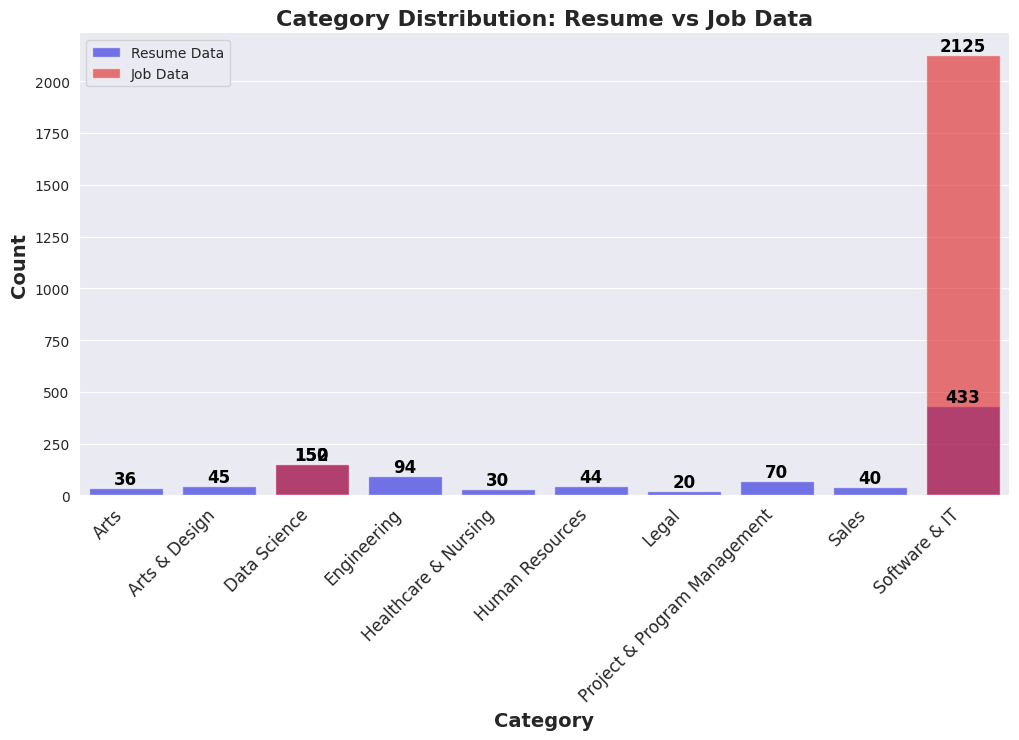

In [18]:
resume_cat_count.columns = ['Category', 'Resume Count']
job_cat_count.columns = ['Category', 'Job Count']

combined_cat_count = pd.merge(resume_cat_count, job_cat_count, on='Category', how='outer')

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

ax = sns.barplot(x='Category', y='Resume Count', data=combined_cat_count, color='b', label='Resume Data', alpha=0.6)
sns.barplot(x='Category', y='Job Count', data=combined_cat_count, color='r', label='Job Data', alpha=0.6)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Category Distribution: Resume vs Job Data', fontsize=16, fontweight='bold')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

sns.despine()

plt.legend()
plt.show()

### **📊 2. Generate a Word Cloud of Most Common Words**

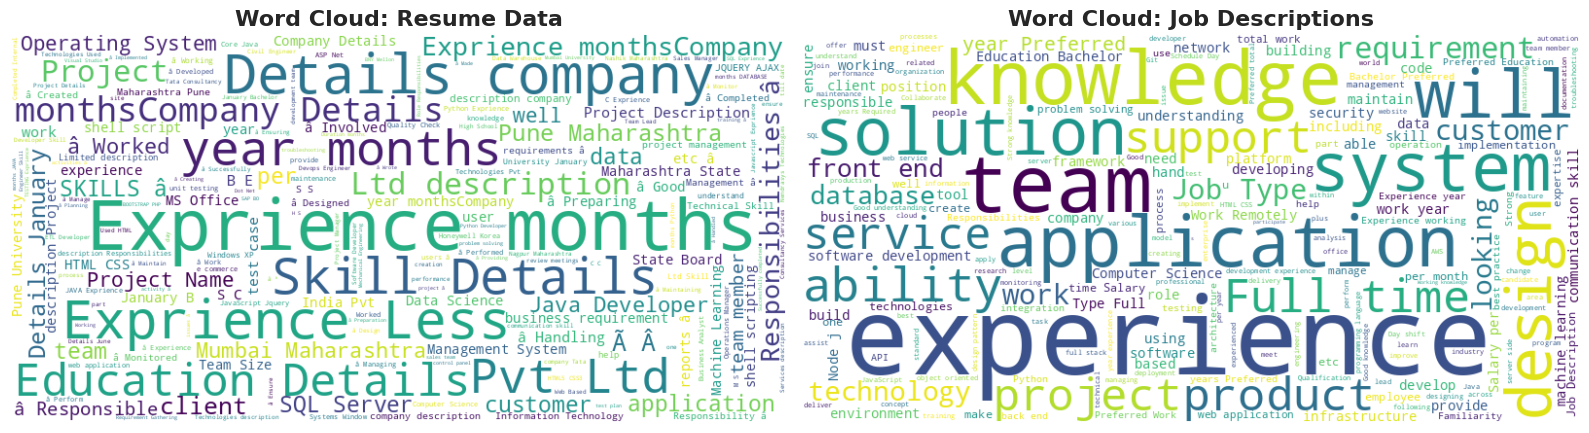

In [19]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
wordcloud_resume = WordCloud(width=800, height=400, background_color='white').generate(' '.join(resume_data['Resume']))
plt.imshow(wordcloud_resume, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Resume Data', fontsize=16, fontweight='bold')

plt.subplot(1, 2, 2)
wordcloud_job_desc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(job_data['Job Description']))
plt.imshow(wordcloud_job_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Job Descriptions', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### **🛠️ Preprocess the Data**

- **Dataset 1 (Resumes):** Clean the text (remove stopwords, lowercase, lemmatization).
- **Dataset 2 (Job Descriptions):** Same preprocessing steps as resumes.

In [20]:
def preprocessor(text):
    # Use only the necessary components to speed up processing
    with nlp.disable_pipes('ner', 'parser', 'textcat'):
        text = re.sub(r'http\S+', ' ', text)  # Remove URLs
        text = re.sub(r'RT|cc', ' ', text)  # Remove RT and cc
        text = re.sub(r'#\S+', ' ', text)  # Remove hashtags
        text = re.sub(r'@\S+', ' ', text)  # Remove mentions
        text = re.sub(r'[^\x00-\x7f]', ' ', text)  # Remove non-ASCII characters
        text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text)  # Normalize spaces

        doc = nlp(text.lower())

        tokens = [
            token.lemma_ for token in doc
            if not token.is_stop and not token.is_punct and not token.is_space
        ]

    return ' '.join(tokens)

In [21]:
resume_data['Cleaned_Resume'] = resume_data['Resume'].swifter.apply(preprocessor)
job_data['Cleaned_Description'] = job_data['Job Description'].swifter.apply(preprocessor)

Pandas Apply:   0%|          | 0/962 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2277 [00:00<?, ?it/s]

In [22]:
resume_data.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python pandas numpy...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail 2013 2017 b e uit rgpv data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [23]:
job_data.head()

,Unnamed: 0,Job Title,Job Description,Category,Cleaned_Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...,Software & IT,look hire expert flutter developer eligible po...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...,Software & IT,python django developer lead job code pdj 04 s...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n...",Data Science,data scientist contractor bangalore responsibi...
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...,Software & IT,job description strong framework outside io pl...
4,4,Full Stack Developer,job responsibility full stack engineer – react...,Software & IT,job responsibility stack engineer react role i...


### **⛓️ Merjed Data**

In [24]:
data = pd.merge(resume_data, job_data, on='Category', how='inner')[["Category", "Cleaned_Resume", "Cleaned_Description"]].drop_duplicates()

In [25]:
data.head()

,Category,Cleaned_Resume,Cleaned_Description
0,Data Science,skill programming language python pandas numpy...,data scientist contractor bangalore responsibi...
1,Data Science,skill programming language python pandas numpy...,remote 2 4 year 8l 12l yr esop available skill...
2,Data Science,skill programming language python pandas numpy...,excite big data machine learning predictive so...
3,Data Science,skill programming language python pandas numpy...,vista equity partner world s lead private equi...
4,Data Science,skill programming language python pandas numpy...,staff machine learn scientist hyderabad bangal...


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159804 entries, 0 to 809049
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Category             159804 non-null  object
 1   Cleaned_Resume       159804 non-null  object
 2   Cleaned_Description  159804 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


## **🛠️ Steps to Use SBERT for Feature Extraction**

### **1. Load SBERT Model**

In [27]:
sbert_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **2. Convert Text to Embeddings**

In [28]:
resume_texts = data['Cleaned_Resume'].tolist()
job_texts = data['Cleaned_Description'].tolist()

In [29]:
resume_embeddings = sbert_model.encode(resume_texts, show_progress_bar=True)
job_embeddings = sbert_model.encode(job_texts, show_progress_bar=True)

Batches:   0%|          | 0/4994 [00:00<?, ?it/s]

Batches:   0%|          | 0/4994 [00:00<?, ?it/s]

### **3. Compute Similarity Between Resume and Job Description**

- You can measure how well a resume matches a job description using cosine similarity:

##### **Efficient Method: Compute Similarity in Batches**

In [30]:
def compute_similarity_in_batches(resume_embeddings, job_embeddings, batch_size=800):
    similarity_scores = []

    for i in range(0, len(resume_embeddings), batch_size):
        batch_resume = resume_embeddings[i:i+batch_size]
        batch_scores = cosine_similarity(batch_resume, job_embeddings)
        max_scores = np.max(batch_scores, axis=1)
        similarity_scores.extend(max_scores)

    return np.array(similarity_scores)

In [31]:
similarity_scores = compute_similarity_in_batches(resume_embeddings, job_embeddings, batch_size=800)

#### **1️⃣ Rank Resumes Based on Similarity Score (Most Relevant Matches)**

- 👉 This helps in ranking resumes for a given job description.

In [32]:
data["Similarity_Score"] = similarity_scores

In [33]:
data_sorted = data.sort_values(by="Similarity_Score", ascending=False)

#### **2️⃣ Define a Threshold for Matching (Filter Relevant Resumes)**

- Instead of returning all resumes, filter out those with low similarity scores (e.g., below 0.7).
- 👉 This helps in removing irrelevant matches.

In [34]:
THRESHOLD = .7
filtered_data = data_sorted[data_sorted["Similarity_Score"] >= THRESHOLD]

#### **3️⃣ Visualize Similarity Scores (Histogram or Heatmap)**
- To analyze how well resumes match job descriptions.

##### **Histogram of Similarity Scores**

- 👉 This helps in understanding the distribution of similarity scores.

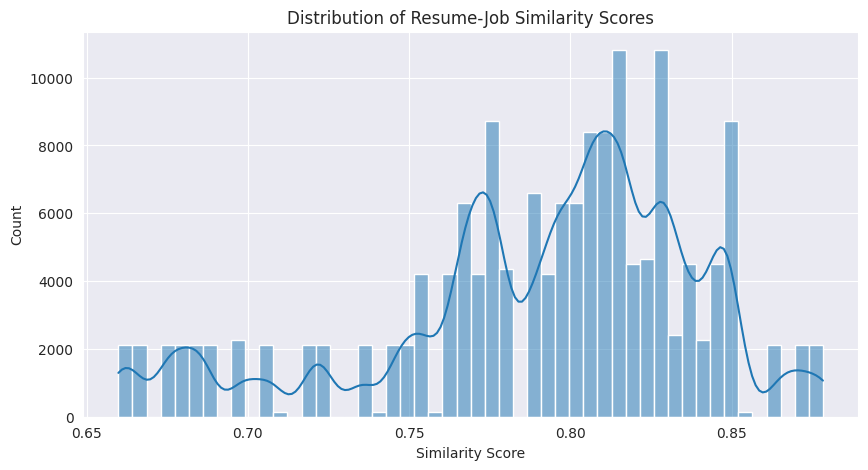

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data["Similarity_Score"], bins=50, kde=True)
plt.title("Distribution of Resume-Job Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Count")
plt.show()